In [1]:
import sys
sys.path.append('../src/')

In [2]:
import os
import config
import vision_utils
import dataset
import torch as th
from torchvision import transforms
import pytorch_lightning as pl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import albumentations as alb
from albumentations.pytorch import ToTensorV2
from torch.utils.tensorboard import SummaryWriter

# Reading files

In [3]:
df = pd.read_csv(os.path.join(config.Config.data_dir, 'dataset.csv'))

In [4]:
df.tail()

,path,label
26173,/home/zeusdric/Dric/DataScience/projects/anima...,cow
26174,/home/zeusdric/Dric/DataScience/projects/anima...,cow
26175,/home/zeusdric/Dric/DataScience/projects/anima...,cow
26176,/home/zeusdric/Dric/DataScience/projects/anima...,cow
26177,/home/zeusdric/Dric/DataScience/projects/anima...,cow


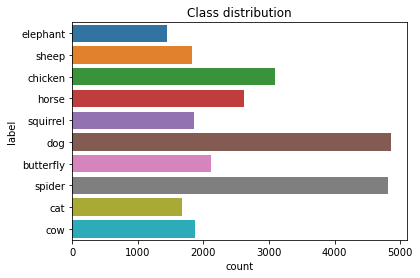

In [5]:
sn.countplot(data=df, y=df.label)
plt.title(label='Class distribution')
plt.show()

# Create dataset/dataloaders

In [6]:
data_transforms = {
    "train": alb.Compose([
        alb.Resize(600, 600, always_apply=True),
        alb.CenterCrop(
            height=config.Config.img_size,
            width=config.Config.img_size, 
           always_apply=True),
        alb.HorizontalFlip(p=.6),
        alb.VerticalFlip(p=.65),
        alb.Rotate(
            limit=35,
            interpolation=1,
            border_mode=4,
            value=None,
            mask_value=None,
            always_apply=False,
            p=0.43,
        ),       
        alb.RandomBrightnessContrast(
            brightness_limit=0.25,
            contrast_limit=0.3,
            always_apply=False,
            p=0.5,
        ),
        alb.Normalize()
        
    ]),
    "test": alb.Compose([
        alb.Resize(600, 600, always_apply=True),
        alb.CenterCrop(height=config.Config.img_size,
                   width=config.Config.img_size,
                   always_apply=True),
        
        alb.HorizontalFlip(p=.62),
        alb.Rotate(
            limit=35,
            interpolation=1,
            border_mode=4,
            value=None,
            mask_value=None,
            always_apply=False,
            p=0.33,
        ),
        alb.RandomBrightnessContrast(
            brightness_limit=0.4,
            contrast_limit=0.3,
            always_apply=False,
            p=0.58,
        ),
        alb.Normalize()

    ]),
}

In [7]:
dm = dataset.DataModule(
    df = df, 
    frac=1,
    data_transforms=data_transforms,
    test_size=.25
)

dm.setup()

[INFO] Training on 19633 samples belonging to 10 classes
[INFO] Validating on 6545 samples belonging to 10 classes


for data in dm.val_ds:
    xs,ys = data["x"], data['y']
    print(xs.size())
    print(ys.size())
    break

# Inspect datasets

vision_utils.show_samples(dataset=dm.val_ds)

# visualize image grid 

In [8]:
for data in dm.val_dataloader():
    xs, ys, predictions = data['x'], data['y'], data['y']
    break
    
    
grid = vision_utils.view_sample(
    images=xs,
    labels=ys,
    predictions=ys,
    return_image=True,
    show=False
)

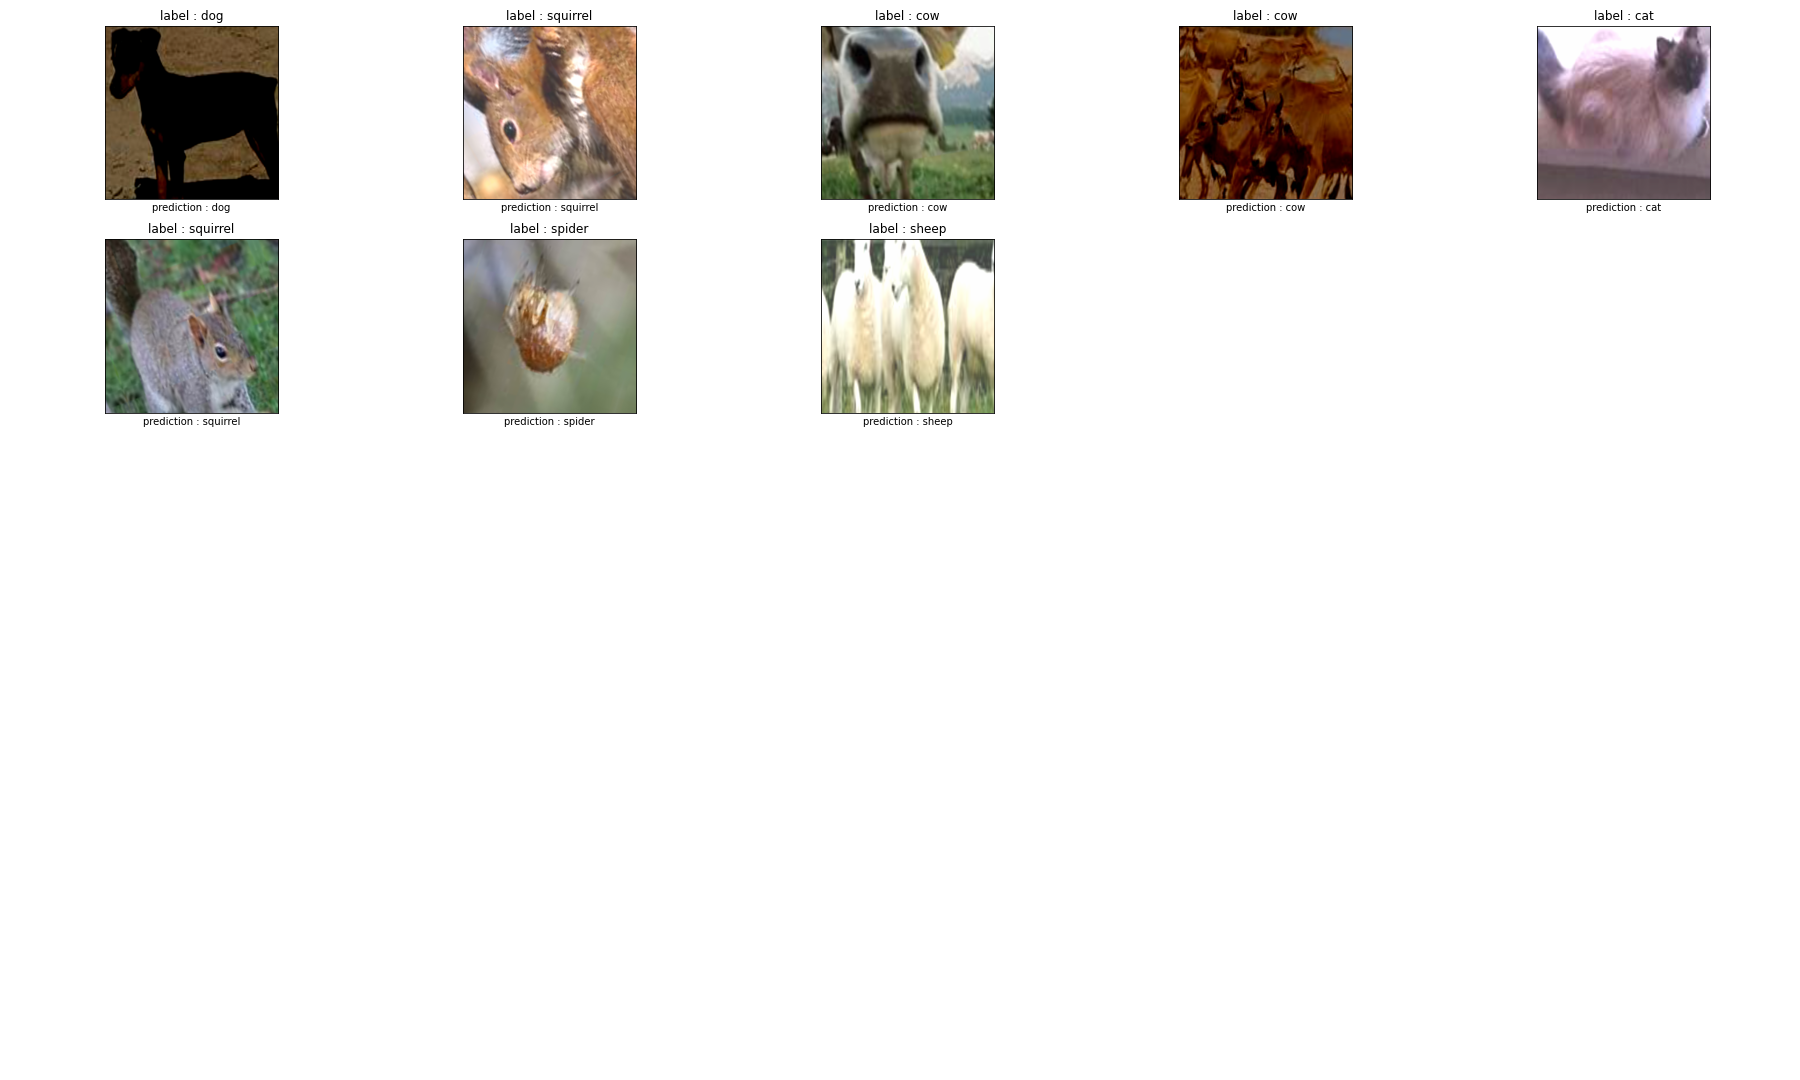

In [9]:
grid

In [10]:
writer = SummaryWriter(log_dir=os.path.join(config.Config.logs_dir, 'plots'))

writer.add_image(
    tag='predictions_grid', 
    img_tensor=np.array(grid), 
    dataformats='HWC'
)
